## Week1 basic homework

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

## [MY CODE] Test Data Load

In [ ]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=False,
    transform=transform
)

10000
torch.Size([1, 28, 28]) 7


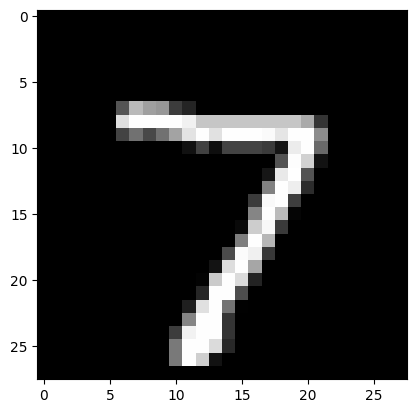

In [ ]:
from matplotlib import pyplot as plt


print(len(testset))
print(testset[0][0].shape, testset[0][1])
plt.imshow(testset[0][0][0], cmap='gray')

## [LOG] test data 확인

## [MY CODE] test data

- shuffle, False
- Batch size, 256 설정

In [ ]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

## 알려주신 accuracy function

In [ ]:
def accuracy(model, dataloader, use_cuda=False):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    if(use_cuda):
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

## [MY CODE] Model 변경

- 마지막에 layer 추가(output 10)
- learning rate = 0.001

In [ ]:
from torch import nn
from torch.optim import SGD

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, n_dim)
    self.layer4 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()


  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))
    x = self.layer4(x)

    return x


model = Model(28 * 28 * 1, 1024)
#model = model.to('cuda')

lr = 0.001
optimizer = SGD(model.parameters(), lr=lr)

## [MY CODE] 학습 진행
- epoch = 100
- label에 one-hot 적용

In [ ]:
import torch.nn.functional as F

n_epochs = 100

train_accuracy_list = []
test_accuracy_list = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    one_hot_labels = F.one_hot(labels, num_classes=10).type(torch.DoubleTensor)
    #inputs, one_hot_labels = inputs.to('cuda'), one_hot_labels.to('cuda')

    preds = model(inputs)
    loss = nn.CrossEntropyLoss()(preds, one_hot_labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_accuracy = accuracy(model, trainloader)
  test_accuracy = accuracy(model, testloader)
  print(f"Epoch {epoch:3d} | Loss: {total_loss} | Acc: {train_accuracy}")

  train_accuracy_list.append(train_accuracy)
  test_accuracy_list.append(test_accuracy)


Epoch   0 | Loss: 540.5767571954057 | Acc: 0.12526666666666667
Epoch   1 | Loss: 539.8338055737937 | Acc: 0.16728333333333334
Epoch   2 | Loss: 539.0763232208168 | Acc: 0.2007
Epoch   3 | Loss: 538.2891198166957 | Acc: 0.23581666666666667
Epoch   4 | Loss: 537.4736702082058 | Acc: 0.29405
Epoch   5 | Loss: 536.6061915333072 | Acc: 0.35651666666666665
Epoch   6 | Loss: 535.6880582322677 | Acc: 0.39748333333333336
Epoch   7 | Loss: 534.7008210342998 | Acc: 0.42445
Epoch   8 | Loss: 533.6315780424824 | Acc: 0.4448
Epoch   9 | Loss: 532.4596944504107 | Acc: 0.45798333333333335
Epoch  10 | Loss: 531.1754262571534 | Acc: 0.4656166666666667
Epoch  11 | Loss: 529.742212632671 | Acc: 0.47125
Epoch  12 | Loss: 528.1467145867646 | Acc: 0.4752166666666667
Epoch  13 | Loss: 526.3525901514416 | Acc: 0.47913333333333336
Epoch  14 | Loss: 524.3417665072096 | Acc: 0.48323333333333335
Epoch  15 | Loss: 522.0421171399454 | Acc: 0.48628333333333335
Epoch  16 | Loss: 519.4204557569077 | Acc: 0.490766666666

## [LOG] epoch 당 loss와 train accuracy

## [MY CODE] 결과 비교

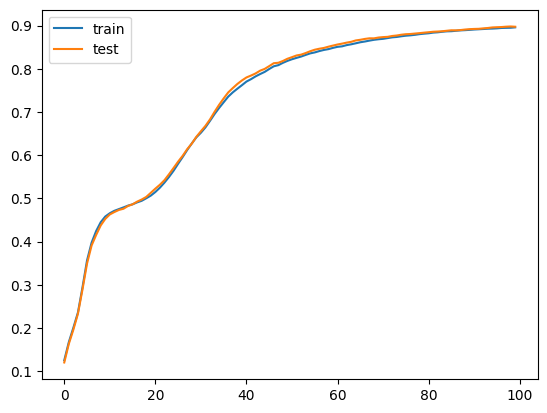

In [ ]:
import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

plot_acc(train_accuracy_list, test_accuracy_list)

## [LOG] 학습에 반영하지 않은 test의 정확도와 train의 정확도가 유사한 것을 보면 overfitting 되지 않고 잘 학습되고 있다는 것을 알 수 있음